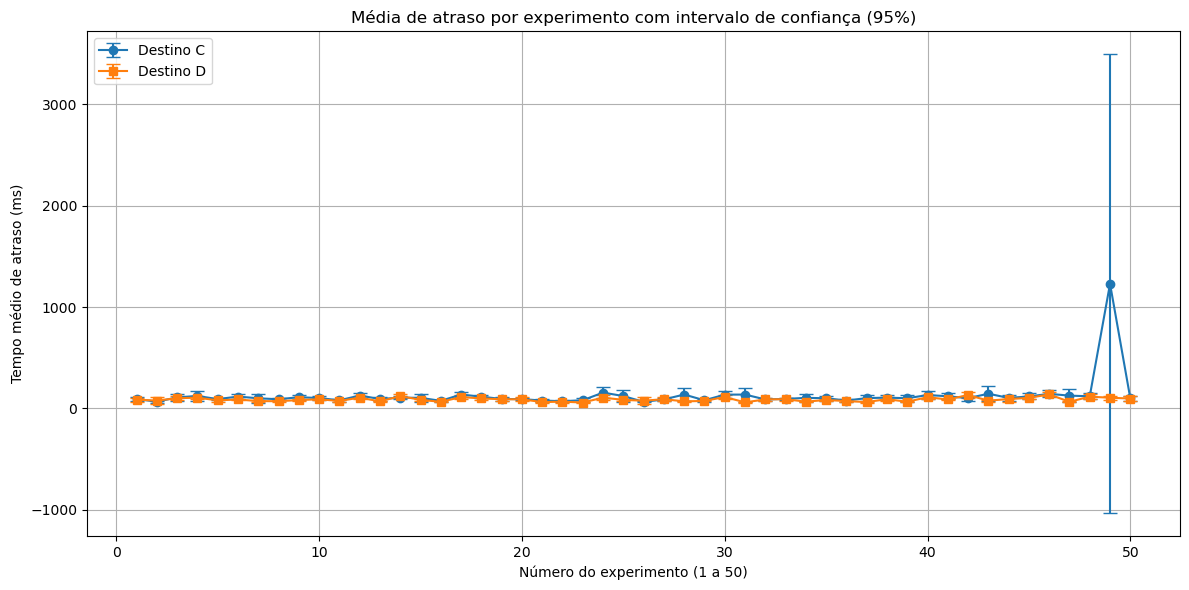

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import numpy as np
from scipy import stats

# Diretório onde estão os CSVs tratados
dir_path = 'dados_tratados/'

# Separar arquivos de A->C e A->D
arquivos_C = sorted(glob.glob(f'{dir_path}/exp-*-A-C.csv'))
arquivos_D = sorted(glob.glob(f'{dir_path}/exp-*-A-D.csv'))

medias_C, ic_C = [], []
medias_D, ic_D = [], []

# Função para calcular média e intervalo de confiança 95%
def calcular_media_ic95(serie):
    media = np.mean(serie)
    desvio = stats.sem(serie)  # erro padrão
    ic = desvio * stats.t.ppf(0.975, len(serie)-1)
    return media, ic

# Processa arquivos A->C
for arquivo in arquivos_C:
    df = pd.read_csv(arquivo)
    media, ic = calcular_media_ic95(df['Tempo (ms)'])
    medias_C.append(media)
    ic_C.append(ic)

# Processa arquivos A->D
for arquivo in arquivos_D:
    df = pd.read_csv(arquivo)
    media, ic = calcular_media_ic95(df['Tempo (ms)'])
    medias_D.append(media)
    ic_D.append(ic)

# Plot
x = list(range(1, 51))  # Experimentos 1 a 50

plt.figure(figsize=(12, 6))
plt.errorbar(x, medias_C, yerr=ic_C, label='Destino C', fmt='-o', capsize=5)
plt.errorbar(x, medias_D, yerr=ic_D, label='Destino D', fmt='-s', capsize=5)

plt.title('Média de atraso por experimento com intervalo de confiança (95%)')
plt.xlabel('Número do experimento (1 a 50)')
plt.ylabel('Tempo médio de atraso (ms)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
